<a href="https://colab.research.google.com/github/hossainsiam133/AgriGrow/blob/main/Code/crop_recommendation_Asif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df.isnull().sum()


,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [ ]:
df.duplicated().sum()

np.int64(0)

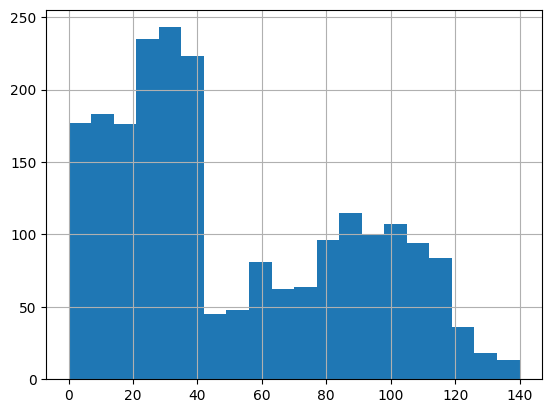

In [ ]:
df['N'].hist(bins=20)
plt.show()

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

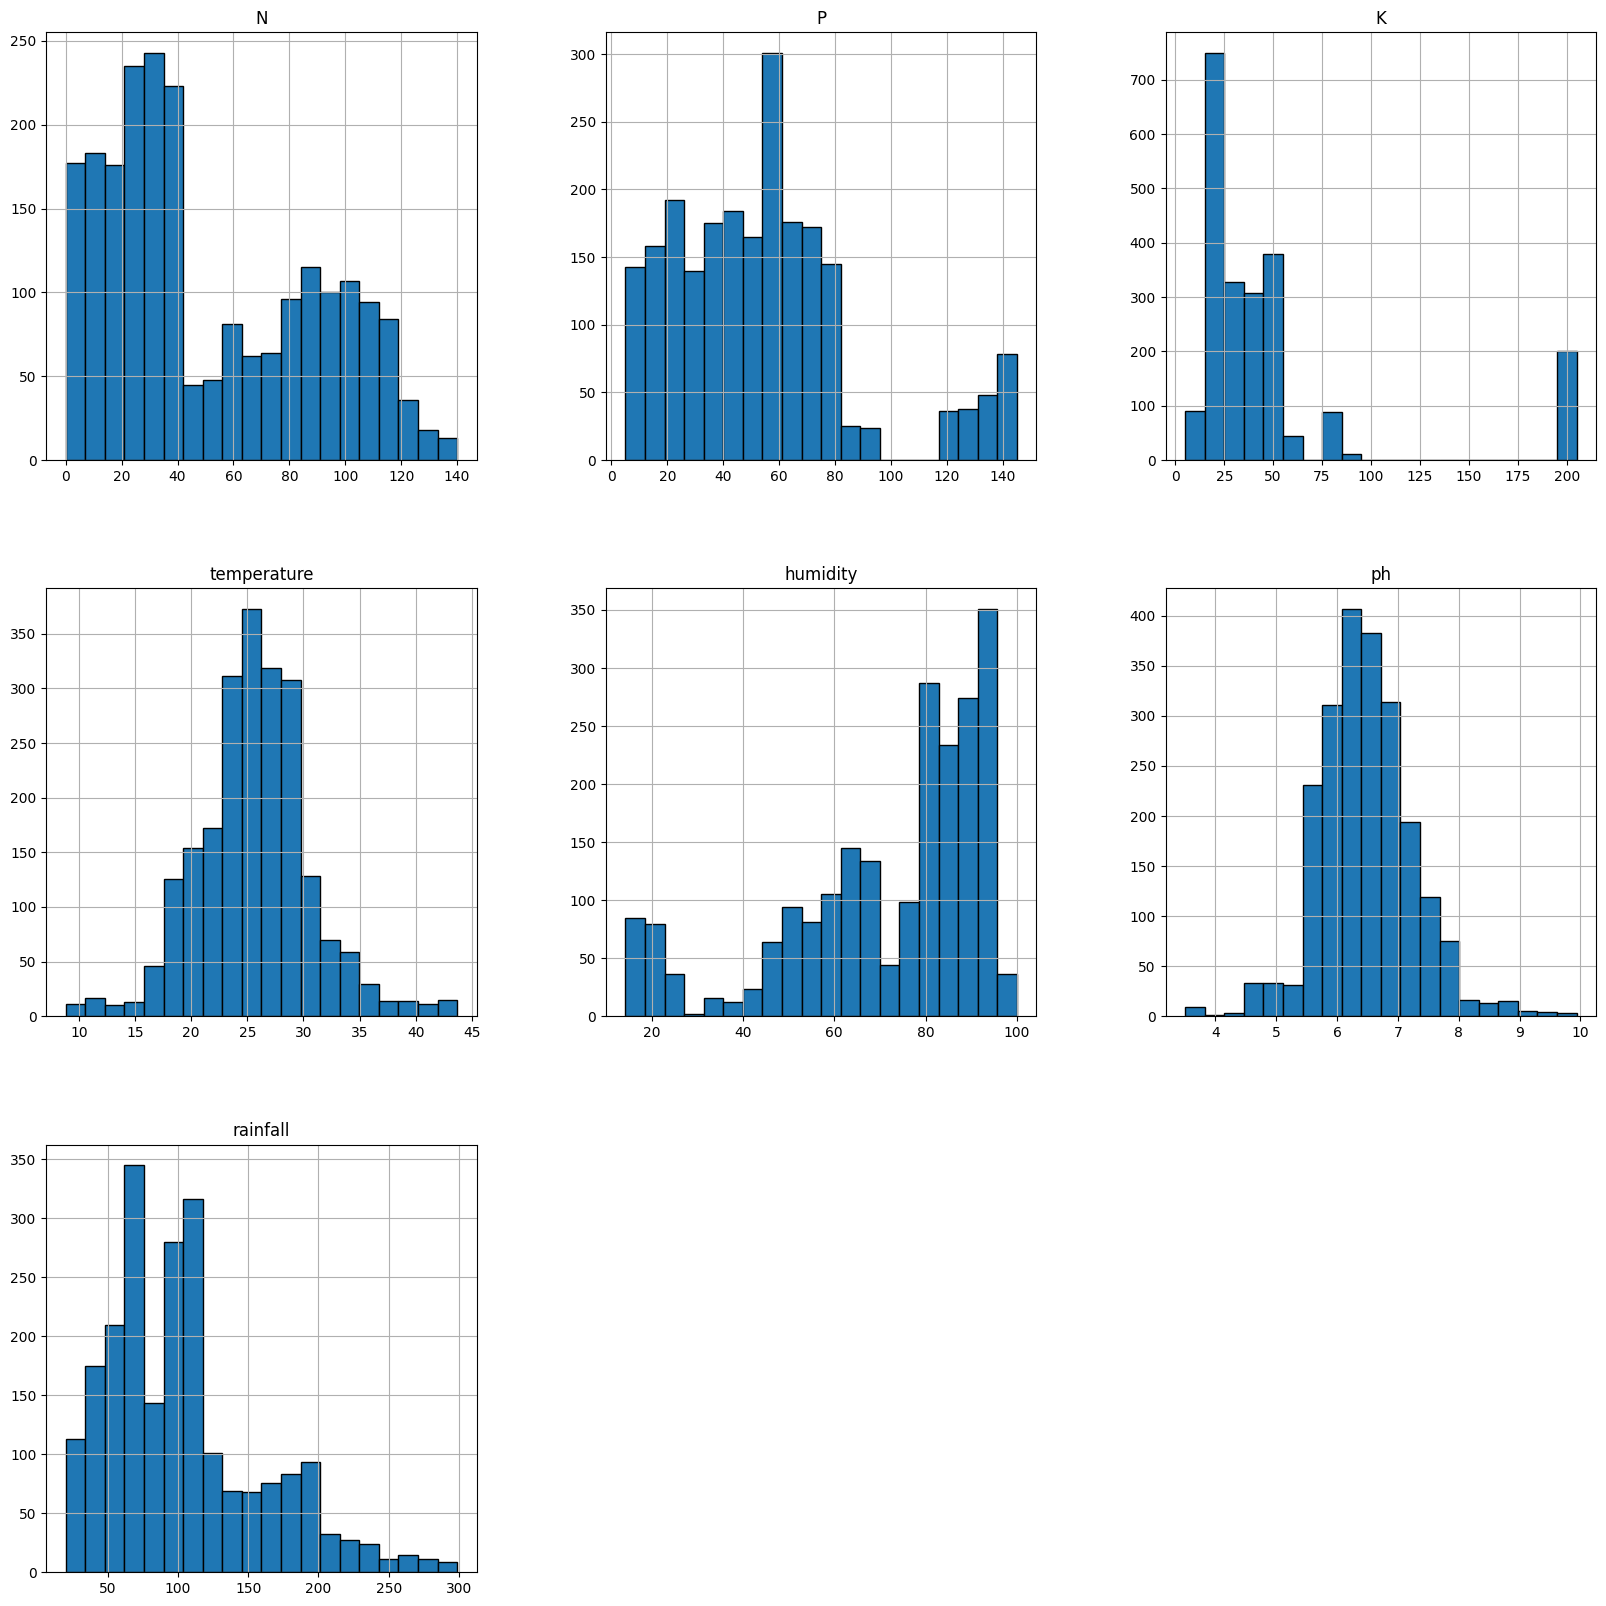

In [ ]:
df.hist(bins=20,figsize=(20,20), edgecolor='black')

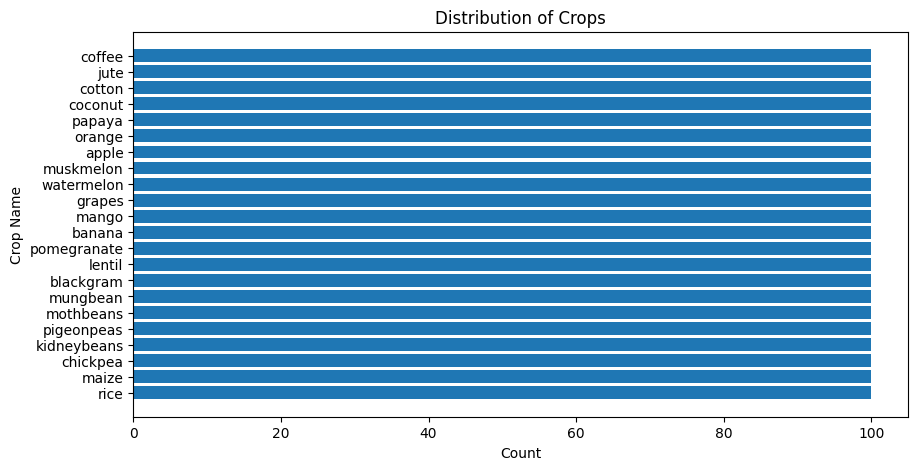

In [ ]:
counts = df['label'].value_counts()
plt.figure(figsize=(10,5))
plt.barh(counts.index, counts.values)
plt.xlabel('Count')
plt.ylabel('Crop Name')
plt.title('Distribution of Crops')
plt.show()

In [ ]:
df['Crop Name Encoded'] = LabelEncoder().fit_transform(df['label'])
df.head(200)

,N,P,K,temperature,humidity,ph,rainfall,label,Crop Name Encoded
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
195,90,57,24,18.928519,72.800861,6.158860,82.341629,maize,11
196,67,35,22,23.305468,63.246480,6.385684,108.760300,maize,11
197,60,54,19,18.748267,62.498785,6.417820,70.234016,maize,11
198,83,58,23,19.742133,59.662631,6.381202,65.508614,maize,11


In [ ]:
numerical_features = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

df[numerical_features] =  StandardScaler().fit_transform(df[numerical_features])

df.head()


,N,P,K,temperature,humidity,ph,rainfall,label,Crop Name Encoded
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361,rice,20
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058,rice,20
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066,rice,20
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048,rice,20
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373,rice,20


In [ ]:
X = df.drop(['label', 'Crop Name Encoded'], axis=1)
y = df['Crop Name Encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1760, 7)
Shape of X_test: (440, 7)
Shape of y_train: (1760,)
Shape of y_test: (440,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.9863636363636363
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00      

In [ ]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00      

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.9568181818181818
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       1.00      1.00      1.00        14
           8       0.81      0.96      0.88        23
           9       0.91      1.00      0.95        20
          10       0.69      1.00      0.81        11
          11       1.00      0.90      0.95        21
          12       0.90      1.00      0.95        19
          13       1.00      0.83      0.91        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00    

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("K-Nearest Neighbors (KNN) Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model Performance:
Accuracy: 0.9681818181818181
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.85      0.96      0.90        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.90      1.00      0.95        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00    

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', random_state=42)

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

print("Support Vector Machine (SVM) Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

Support Vector Machine (SVM) Model Performance:
Accuracy: 0.9681818181818181
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00 

# Task
Implement and evaluate a Voting Classifier and a Gradient Boosting Classifier, then summarize the performance of all models implemented so far (Decision Tree, Random Forest, K-Nearest Neighbors, Support Vector Machine, Voting Classifier, and Gradient Boosting Classifier) to determine the best-performing model for the dataset.

## Implement Voting Classifier

### Subtask:
Create a `VotingClassifier` using the previously trained `DecisionTreeClassifier`, `RandomForestClassifier`, `KNeighborsClassifier`, and `SVC` models. This will combine their predictions to potentially achieve higher accuracy.


**Reasoning**:
I need to import `VotingClassifier` from `sklearn.ensemble`, define the estimators list with the previously trained models, and then instantiate and fit the `VotingClassifier` on the training data.



In [ ]:
from sklearn.ensemble import VotingClassifier

estimators = [
    ('dt', dt_model),
    ('rf', rf_model),
    ('knn', knn_model),
    ('svm', svm_model)
]

voting_clf = VotingClassifier(estimators=estimators, voting='hard', n_jobs=-1)
voting_clf.fit(X_train, y_train)

print("VotingClassifier trained successfully.")

VotingClassifier trained successfully.


**Reasoning**:
Now that the VotingClassifier is trained, I will evaluate its performance on the test data by making predictions and then calculating the accuracy and generating a classification report to assess its effectiveness.



In [ ]:
y_pred_voting = voting_clf.predict(X_test)

print("Voting Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_voting))
print("Classification Report:\n", classification_report(y_test, y_pred_voting))

Voting Classifier Model Performance:
Accuracy: 0.9795454545454545
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.88      0.96      0.92        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00  

**Reasoning**:
Now I will implement and evaluate a Gradient Boosting Classifier. First, I need to import `GradientBoostingClassifier` from `sklearn.ensemble`.



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

print("GradientBoostingClassifier imported successfully.")

GradientBoostingClassifier imported successfully.


**Reasoning**:
Now that GradientBoostingClassifier has been imported, I need to instantiate and train the model using the training data (`X_train`, `y_train`).



In [ ]:
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

print("Gradient Boosting Classifier trained successfully.")

Gradient Boosting Classifier trained successfully.


**Reasoning**:
Now that the Gradient Boosting Classifier is trained, I will evaluate its performance on the test data by making predictions and then calculating the accuracy and generating a classification report to assess its effectiveness.



In [ ]:
y_pred_gb = gb_model.predict(X_test)

print("Gradient Boosting Classifier Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))
print("Classification Report:\n", classification_report(y_test, y_pred_gb))

Gradient Boosting Classifier Model Performance:
Accuracy: 0.9818181818181818
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      0.96      0.98        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.82      1.00      0.90        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00 

**Reasoning**:
To summarize the performance of all models, I will collect the accuracy scores for each model and present them in a clear format to determine the best-performing model.



In [ ]:
model_performance = {
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'K-Nearest Neighbors': accuracy_score(y_test, y_pred_knn),
    'Support Vector Machine': accuracy_score(y_test, y_pred_svm),
    'Voting Classifier': accuracy_score(y_test, y_pred_voting),
    'Gradient Boosting': accuracy_score(y_test, y_pred_gb)
}

performance_df = pd.DataFrame(model_performance.items(), columns=['Model', 'Accuracy'])
performance_df = performance_df.sort_values(by='Accuracy', ascending=False)

print("\nSummary of Model Performance (Accuracy):\n")
print(performance_df.to_string(index=False))



Summary of Model Performance (Accuracy):

                 Model  Accuracy
         Random Forest  0.993182
         Decision Tree  0.986364
     Gradient Boosting  0.981818
     Voting Classifier  0.979545
Support Vector Machine  0.968182
   K-Nearest Neighbors  0.968182


## Summary:

### Q&A
The best-performing model for the dataset is the Random Forest Classifier with an accuracy of 0.993182.

### Data Analysis Key Findings
*   A Voting Classifier, combining Decision Tree, Random Forest, K-Nearest Neighbors, and Support Vector Machine models, achieved an accuracy of 0.9795.
*   A Gradient Boosting Classifier was implemented and evaluated, yielding an accuracy of 0.9818.
*   Upon summarizing all implemented models, the Random Forest Classifier demonstrated the highest accuracy at 0.993182, followed by the Decision Tree Classifier (0.986364) and the Gradient Boosting Classifier (0.981818).
*   The Voting Classifier performed moderately, surpassing the Support Vector Machine and K-Nearest Neighbors, both of which had an accuracy of 0.968182.

### Insights or Next Steps
*   The Random Forest Classifier, being the top performer, could be further optimized through hyperparameter tuning to potentially enhance its performance even more.
*   Given the strong performance of ensemble methods (Random Forest, Gradient Boosting, Voting Classifier), exploring other advanced ensemble techniques like XGBoost or LightGBM could be beneficial.
